In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SK_LogisticRegression
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
class PolynomialRegression():
    def __init__(self, degree=None, learning_rate=0.001, epochs=100000) -> None:
        if degree <= 0:
            raise ValueError("Degree must be a positive number greater")
        self.degree = degree if degree else 1
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None
        self.costs = []

    def _extend_polynomial(self, X):
        return np.hstack([X**i for i in range(1, self.degree + 1)])

    def _normalize(self, X):
        return (X - self.minX) / (self.maxX - self.minX)

    def fit(self, X, y, subplots=False):
        sorting_indices = np.argsort(X, axis=0)
        X = X[sorting_indices].reshape(-1,1)
        y = y[sorting_indices].reshape(-1,1)
        self.X = X
        X = self._extend_polynomial(X)
        self.minX = np.min(X, axis=0)
        self.maxX = np.max(X, axis=0)
        X = self._normalize(X)

        X = np.hstack((np.ones((X.shape[0], 1)), X))

        self.theta = np.zeros((X.shape[1], 1))
        m, n = X.shape
        prev_cost = float('inf')
        self.costs = []

        for epoch in range(self.epochs):
            y_pred = np.dot(X, self.theta)
            error = y_pred - y
            cost = (1/(2*m) * np.sum(np.square(error)))
            d_theta = (1/m) * np.dot(X.T, error)
            self.theta = self.theta - self.learning_rate * d_theta
            self.costs.append(cost)
            if abs(prev_cost - cost) < 0.0001:
                print(f'Converged at epoch {epoch}')
                break
            prev_cost = cost
            if subplots:
                plt.scatter(self.X, y, c="red")
                plt.plot(self.X, y_pred)
                plt.pause(0.0001)
                plt.clf()

        plt.scatter(self.X, y, c="red")
        plt.plot(self.X, y_pred)
        plt.show()

    def plot_error_history(self):
        plt.plot(np.arange(1,len(self.costs) + 1), self.costs)
        plt.xlabel('Number of epochs')
        plt.ylabel('Mean Squared Error')
        plt.title('MSE vs Epochs')
        plt.show()

    def predict(self, X):
        X = self._extend_polynomial(X)
        X = self._normalize(X)
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        y_pred = np.dot(X, self.theta)
        return y_pred

In [3]:
class LogisticRegression():
    def __init__(self, learning_rate=0.001, epochs=100000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None
        self.costs = []
        self.B = 0

    def g(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.X = X
        self.theta = np.zeros((X.shape[1], 1))
        m, n = X.shape
        prev_cost = float('inf')
        self.costs = []
        for epoch in range(self.epochs):
            Z = np.dot(X, self.theta)
            y_pred = self.g(Z)
            cost = -(1/m)*np.sum( y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
            error = y_pred - y
            d_theta = (1/m) * np.dot(X.T, error)
            self.theta = self.theta - self.learning_rate * d_theta
            self.costs.append(cost)
            prev_cost = cost

    def optimized_fit(self, X, y):
        self.X = X
        self.theta = np.zeros((X.shape[1], 1))
        m, n = X.shape
        prev_cost = float('inf')
        self.costs = []
        self.B = 0
        for epoch in range(self.epochs):
            Z = np.dot(X, self.theta) + self.B
            y_pred = self.g(Z)
            cost = -(1/m)*np.sum( y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
            error = y_pred - y
            d_theta = (1/m) * np.dot(X.T, error)
            d_B = (1/m) * np.sum(error)
            self.theta = self.theta - self.learning_rate * d_theta
            self.B = self.B - self.learning_rate * d_B
            self.costs.append(cost)
            prev_cost = cost

    def plot_error_history(self):
        plt.plot(np.arange(1,len(self.costs) + 1), self.costs)
        plt.xlabel('Number of epochs')
        plt.ylabel('Cost')
        plt.title('MSE vs Epochs')
        plt.show()

    def predict(self, X):
        Z = np.dot(X, self.theta) + self.B
        y_pred = self.g(Z)
        y_pred = y_pred > 0.5
        y_pred = np.array(y_pred, dtype="int64")
        return y_pred

In [4]:
class LinearRegression():
    def __init__(self, learning_rate=0.001, epochs=50000, normalization='min_max') -> None:
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None
        self.costs = []
        self.normalization = normalization
    
    def _normalize(self, X):
        if self.normalization == 'min_max':
            return (X - self.min) / (self.max - self.min)
        else:
            return (X - self.mean) / self.std
    
    def fit(self, X, y, subplots=False):
        self.X = X
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        self.min = np.min(X, axis=0)
        self.max = np.max(X, axis=0)
        X = self._normalize(X)
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.theta = np.zeros((X.shape[1], 1))
        m, n = X.shape
        prev_cost = float('inf')
        self.costs = []

        for epoch in range(self.epochs):
            y_pred = np.dot(X, self.theta)
            error = y_pred - y
            cost = (1/(2*m) * np.sum(np.square(error)))
            d_theta = (1/m) * np.dot(X.T, error)
            self.theta = self.theta - self.learning_rate * d_theta
            self.costs.append(cost)
            if abs(prev_cost - cost) < 0.001:
                print(f'Converged at epoch {epoch}')
                break
            prev_cost = cost
            if subplots and self.X.shape[1] == 1:
                plt.scatter(self.X, y, c="red")
                plt.plot(self.X, y_pred)
                plt.pause(0.0001)
                plt.clf()
    
        if self.X.shape[1] == 1:
            plt.scatter(self.X, y, c="red")
            plt.plot(self.X, y_pred)
            plt.show()
        
    def plot_error_history(self):
        #plt.xlim(0, self.epochs)
        plt.plot(np.arange(1,len(self.costs) + 1), self.costs)
        plt.xlabel('Number of epochs')
        plt.ylabel('Mean Squared Error')
        plt.title('MSE vs Epochs (30% - 70%) ')
        plt.show()

    def predict(self, X):
        X = self._normalize(X)
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        y_pred = np.dot(X, self.theta)
        return y_pred

In [5]:
class MinMaxScaler():
    def __init__(self):
        self.min_val = None
        self.max_val = None

    def fit(self, X):
        self.min_val = X.min(axis=0)
        self.max_val = X.max(axis=0)

    def transform(self, X):
        if self.min_val is None or self.max_val is None:
            raise ValueError("You must fit before transform")
        X_scaled = (X - self.min_val) / (self.max_val - self.min_val)
        return X_scaled

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [6]:
def my_train_test_split(X,y, train_size=0.7):
    sep = int(len(X) * train_size)
    X_train, X_test = X[:sep], X[sep:]
    y_train, y_test = y[:sep], y[sep:]
    return X_train, X_test, y_train, y_test

In [7]:
def preprocess_dataframe_lin(df):
    def onehotencode(df, column):
        onehot = pd.get_dummies(df[column], dtype=int)
        df.drop([column], axis=1, inplace=True)
        df = pd.concat([df, onehot], axis=1)
        return df.iloc[:,:-1]
    y = (df.iloc[:,-1].values).reshape(-1,1)
    df.drop(['Profit'], axis = 1, inplace=True)
    df = onehotencode(df, 'State')
    X = df.iloc[:,:].values
    return X, y

In [8]:
def backwards_elimination(X, y, SL):
    X = np.append(arr=np.ones((X.shape[0], 1)).astype(int), values=X, axis=1)
    arr = [ i for i in range(len(X[0]))]
    endwhile = False
    while not endwhile:
        X_opt = X[:,arr]
        regression_OLS = sm.OLS(endog=y, exog=X_opt.tolist()).fit()
        values = regression_OLS.pvalues
        max_p_value = max(values)
        if max_p_value > SL:
            arr.pop(values.tolist().index(max_p_value))
        else:
            endwhile = True
    return X_opt[:,1:]

def preprocess_dataframe_poly(df):
    def ohe(df, column):
        onehot = pd.get_dummies(df[column], dtype=int)
        df.drop([column], axis=1, inplace=True)
        df = pd.concat([df, onehot], axis=1)
        return df.iloc[:,:-1]
    y = (df.iloc[:,-1].values).reshape(-1,1)
    #df.drop(['Profit'], axis = 1, inplace=True)
    df = ohe(df, 'State') # OneHotEncode whatever column you want
    profit = df.pop('Profit')
    df['Profit'] = profit
    X = df.iloc[:,:].values
    return df

In [9]:
def plot_mse_bars(a, b):
    etiquetas = ['70% vs 30%', '50% vs 50%', '30% vs 70%']
    width = 0.3
    x = np.arange(len(etiquetas))
    font_size = 10

    plt.bar(x - width/2, a, width=width, label='Proposed Model')
    plt.bar(x + width/2, b, width=width, label='Sklearn Model')

    for xi, ai, bi in zip(x, a, b):
        ai_label = '{:.1e}'.format(ai)
        bi_label = '{:.1e}'.format(bi)
        plt.text(xi - width/2, ai, ai_label, ha='center', va='bottom', fontsize=font_size)
        plt.text(xi + width/2, bi, bi_label, ha='center', va='bottom', fontsize=font_size)

    plt.xticks(x, etiquetas)
    plt.legend(loc='lower left')
    plt.xlabel("Train size vs Test size")
    plt.ylabel("MSE Score")
    plt.title("Comparación de MSE (Proposed model vs Sklearn model)" )
    plt.show()

In [10]:
def experiment_with_train_size_lin(X, y):
    train_sizes = [0.7, 0.5, 0.3]
    mse_proposed_model = []
    mse_sklearn_model = []
    for train_size in train_sizes:
        X_train, X_test, y_train, y_test = my_train_test_split(X, y, train_size=train_size)
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        model_mse = mean_squared_error(y_test, y_pred)
        
        sklearn_model = LR()
        sklearn_model.fit(X_train, y_train)
        y_pred = sklearn_model.predict(X_test)
        sklearn_mse = mean_squared_error(y_test, y_pred)
        
        mse_proposed_model.append(model_mse)
        mse_sklearn_model.append(sklearn_mse)
        
    plot_mse_bars(mse_proposed_model, mse_sklearn_model)

In [11]:
def experiment_with_train_size_poly(X, y):
    train_sizes = [0.7, 0.5, 0.3]
    mse_proposed_model = []
    mse_sklearn_model = []
    for train_size in train_sizes:
        X_train, X_test, y_train, y_test = my_train_test_split(X, y, train_size=train_size)
        
        model = PolynomialRegression(degree=2, learning_rate=0.01, epochs=50000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        model_mse = mean_squared_error(y_test, y_pred)

        poly_reg = PolynomialFeatures(degree=2)
        X_poly = poly_reg.fit_transform(X_train)
        sklearn_model = LR()
        sklearn_model.fit(X_poly, y_train)
        y_pred = sklearn_model.predict(poly_reg.fit_transform(X_test))
        sklearn_mse = mean_squared_error(y_test, y_pred)
        
        mse_proposed_model.append(model_mse)
        mse_sklearn_model.append(sklearn_mse)
    
    plot_mse_bars(mse_proposed_model, mse_sklearn_model)

In [12]:
def accuracy(cm):
    return (cm[0,0] + cm[1,1])/(cm[0,0] + cm[0,1] + cm[1,1] + cm[1,0])

def plot_mesh_grid(X, y, clf, xlabel="", ylabel="", title=""):
    from matplotlib.colors import ListedColormap
    X_set, y_set = X, y
    y_set = y_set.ravel()
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])
    Z = Z.reshape(X1.shape)
    plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['#FF0000', '#008000']))  # Fondo más oscuro (alpha=0.5)
    padding = 0.95
    plt.xlim(X1.min() + padding, X1.max() - padding)
    plt.ylim(X2.min()+ padding, X2.max() - padding)
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    color = ListedColormap(['#FF0000', '#008000'])(i), label = j)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

def experiment_with_train_size_log(X, y):
    def plot_accuracy_bars(a, b):
        tags = ['70% vs 30%', '50% vs 50%', '30% vs 70%']
        width = 0.3
        x = np.arange(len(tags))
        font_size = 10

        plt.bar(x - width/2, a, width=width, label='Implemented Model')
        plt.bar(x + width/2, b, width=width, label='Sklearn Model')

        for xi, ai, bi in zip(x, a, b):
            plt.text(xi - width/2, ai, '%.2f' % ai, ha='center', va='bottom', fontsize=font_size)
            plt.text(xi + width/2, bi, '%.2f' % bi, ha='center', va='bottom', fontsize=font_size)

        plt.xticks(x, tags)
        plt.legend(loc='lower left')
        plt.xlabel("Train size vs Test size")
        plt.ylabel("Accuracy")
        plt.title("Accuracy comparison (Implemented model vs Sklearn model)" )
        plt.show()

    train_sizes = [0.7, 0.5, 0.3]
    accuracy_proposed_model = []
    accuracy_sklearn_model = []
    for train_size in train_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=0)

        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        model = LogisticRegression(0.01, 150000)
        model.optimized_fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        model_accuracy = accuracy(cm)

        sklearn_model = SK_LogisticRegression()
        sklearn_model.fit(X_train, y_train.ravel())
        y_pred = sklearn_model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        sklearn_accuracy = accuracy(cm)

        accuracy_proposed_model.append(model_accuracy)
        accuracy_sklearn_model.append(sklearn_accuracy)
        
        plot_mesh_grid(X_test, y_test, clf=model, xlabel="Age (years)",
                       ylabel="Estimated Salary ($)", title="Classifier (Testing Set)")
        
    plot_accuracy_bars(accuracy_proposed_model, accuracy_sklearn_model)

In [13]:
df_lin_regression = pd.read_csv("https://raw.githubusercontent.com/RayverAimar/regression_algorithms/master/datasets/50_Startups.csv")
df_lin_regression.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [14]:
df_lin_regression = df_lin_regression.sample(frac=1, random_state=42).reset_index(drop=True)
Xlin, ylin = preprocess_dataframe_lin(df_lin_regression)

In [15]:
df_pol_regression = pd.read_csv("https://raw.githubusercontent.com/RayverAimar/regression_algorithms/master/datasets/50_Startups.csv")
df_pol_regression.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [16]:
df_pol_regression = df_pol_regression[(df_pol_regression != 0).all(1)]
df_pol_regression = df_pol_regression.sample(frac=1, random_state=42).reset_index(drop=True)
df_pol_regression = preprocess_dataframe_poly(df_pol_regression)

X_poly = df_pol_regression.iloc[:,:-1].values
y_poly = df_pol_regression.iloc[:,-1].values

X_opt = backwards_elimination(X_poly, y_poly, 0.05)
y_poly = y_poly.reshape(-1,1)

In [17]:
df_classification = pd.read_csv("https://raw.githubusercontent.com/RayverAimar/machine-learning-scripts/master/3%20-%20Classification/Section%2014%20-%20Logistic%20Regression/Social_Network_Ads.csv")
df_classification.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [18]:
Xlog = df_classification.iloc[:,2:4].values
ylog = df_classification.iloc[:,-1].values.reshape(-1,1)

# Linear Regression

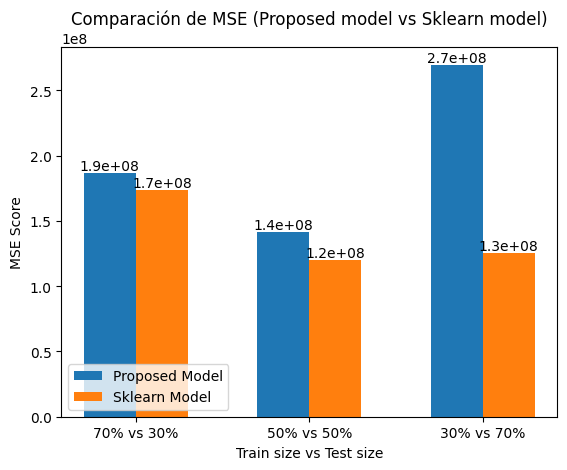

In [19]:
experiment_with_train_size_lin(Xlin, ylin)

# Polynomial Regression

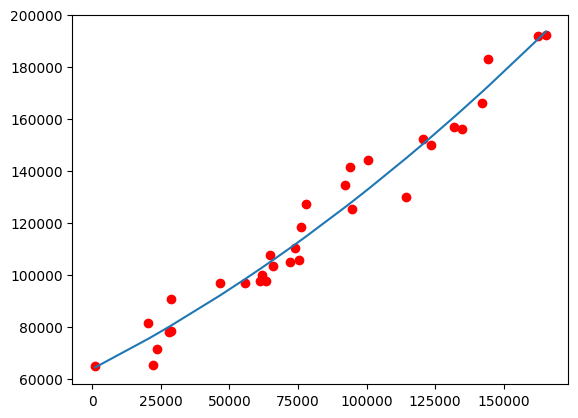

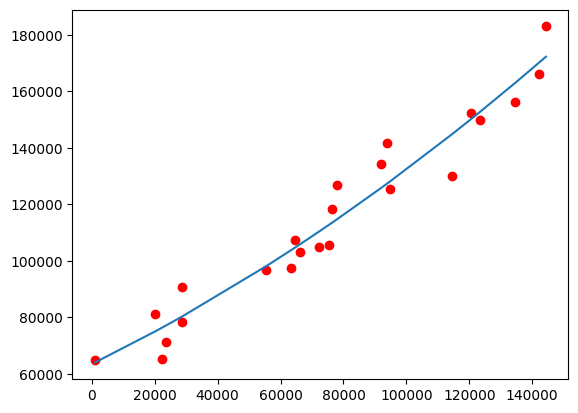

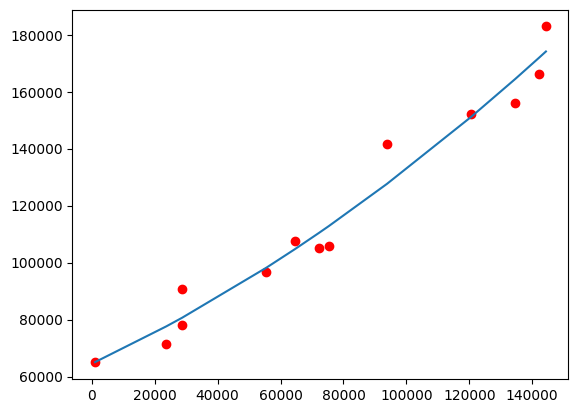

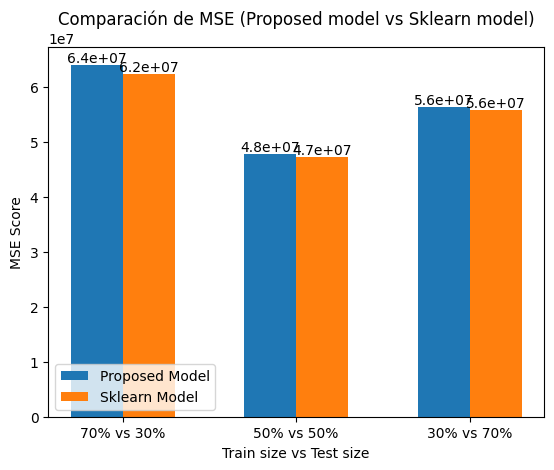

In [20]:
experiment_with_train_size_poly(X_opt, y_poly)

# Logistic Regression

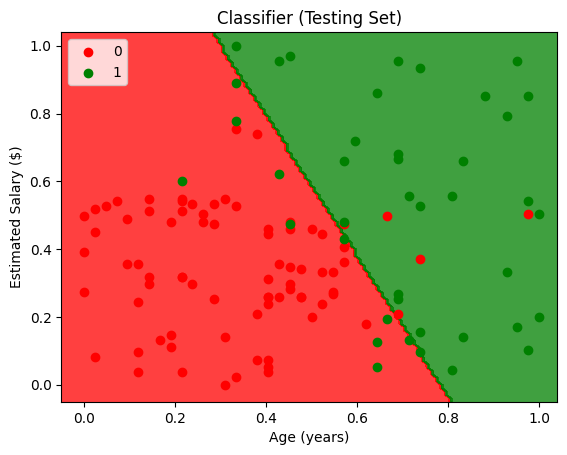

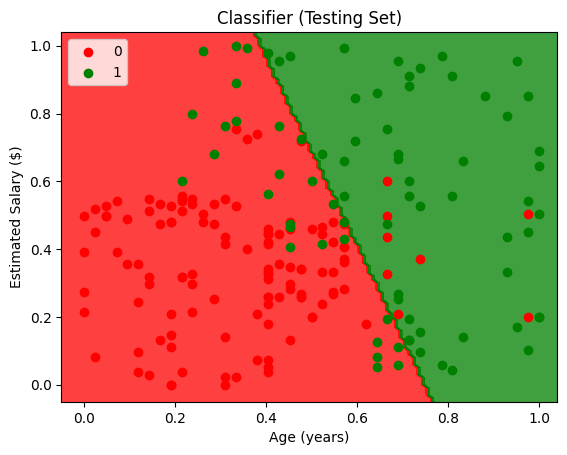

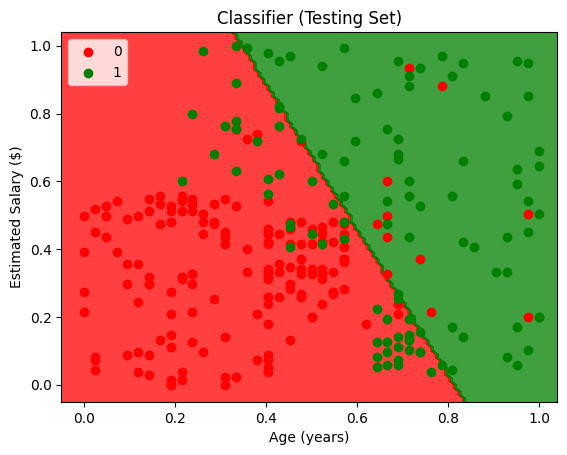

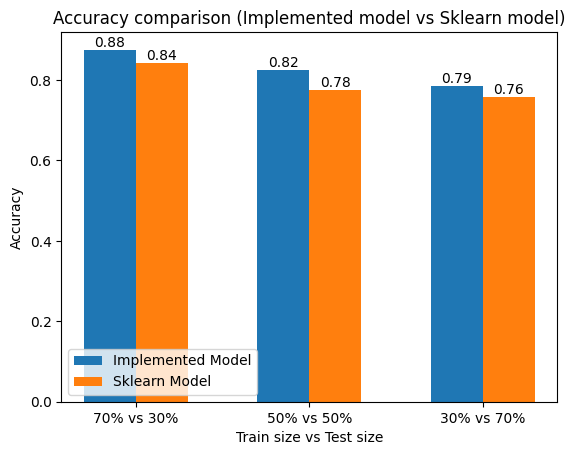

In [21]:
experiment_with_train_size_log(Xlog, ylog)